<a href="https://colab.research.google.com/github/jagdishdatascintist/jagdish_aiml/blob/main/Disaster_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train = pd.read_csv(r'/content/train_csv.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7583 entries, 0 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7583 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7583 non-null   object
 4   target    7583 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 296.3+ KB


In [ ]:
train.describe()

,id,target
count,7583.000000,7583.000000
mean,5420.523276,0.427799
std,3124.752956,0.494792
min,1.000000,0.000000
25%,2726.500000,0.000000
50%,5383.000000,0.000000
75%,8114.500000,1.000000
max,10834.000000,1.000000


In [ ]:
train.isnull().sum()

,0
id,0
keyword,31
location,2503
text,0
target,0


In [ ]:
train = train.drop(columns=['id', 'keyword','location'])
print(train)

                                                   text  target
0     Our Deeds are the Reason of this #earthquake M...       1
1                Forest fire near La Ronge Sask. Canada       1
2     All residents asked to 'shelter in place' are ...       1
3     13,000 people receive #wildfires evacuation or...       1
4     Just got sent this photo from Ruby #Alaska as ...       1
...                                                 ...     ...
7578   @jt_ruff23 @cameronhacker and I wrecked you both       0
7579  Three days off from work and they've pretty mu...       0
7580  #FX #forex #trading Cramer: Iger's 3 words tha...       0
7581  @engineshed Great atmosphere at the British Li...       0
7582  Cramer: Iger's 3 words that wrecked Disney's s...       0

[7583 rows x 2 columns]


In [ ]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7578,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,Three days off from work and they've pretty mu...,0
7580,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,@engineshed Great atmosphere at the British Li...,0


### EDA

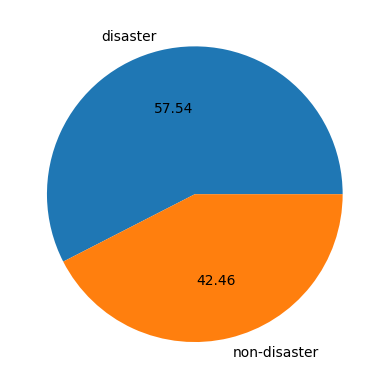

In [ ]:
import matplotlib.pyplot as plt
plt.pie(train['target'].value_counts(),labels=['disaster','non-disaster'],autopct='%0.2f')
plt.show()

### Use NLP

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train['text'].head(10)

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
5,#RockyFire Update => California Hwy. 20 closed...
6,#flood #disaster Heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...
8,There's an emergency evacuation happening now ...
9,I'm afraid that the tornado is coming to our a...


In [ ]:
train['text'] = train['text'].str.lower()

In [ ]:
train.head()

,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


In [ ]:
train['text'].duplicated().sum()

106

In [ ]:
train = train.drop_duplicates(subset=['text'], keep='first')

In [ ]:
import string
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

train['clean_text'] = train['text'].apply(remove_punc)

<ipython-input-43-33488a72a0f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_text'] = train['text'].apply(remove_punc)


In [ ]:
train['clean_text'].head()

,clean_text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska as s...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

train['clean_text'] = train['clean_text'].apply(remove_stopwords)

<ipython-input-46-a88519e4a084>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_text'] = train['clean_text'].apply(remove_stopwords)


In [ ]:
train['clean_text'].head()

,clean_text
0,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask canada
2,residents asked shelter place notified officer...
3,13000 people receive wildfires evacuation orde...
4,got sent photo ruby alaska smoke wildfires pou...


In [ ]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FA6F"
        "\U0001FA70-\U0001FAFF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)


train['clean_text'] = train['clean_text'].apply(remove_emojis)

<ipython-input-48-8fe531f74bdc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_text'] = train['clean_text'].apply(remove_emojis)


In [ ]:
train.head()

,text,target,clean_text
0,our deeds are the reason of this #earthquake m...,1,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada
2,all residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby #alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
train['tokenized_sentence'] = train['clean_text'].apply(sent_tokenize)

<ipython-input-51-5a3e94c47d2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokenized_sentence'] = train['clean_text'].apply(sent_tokenize)


In [ ]:
train['tokenized_sentence'].head()

,tokenized_sentence
0,[deeds reason earthquake may allah forgive us]
1,[forest fire near la ronge sask canada]
2,[residents asked shelter place notified office...
3,[13000 people receive wildfires evacuation ord...
4,[got sent photo ruby alaska smoke wildfires po...


### Using Word2Vec

In [ ]:
import numpy as np
import gensim
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(sentences=train['tokenized_sentence'],
                 vector_size=100, window=5,
                 min_count=1,
                 workers=4
                )



def get_sentence_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

train['sentence_vector'] = train['tokenized_sentence'].apply(lambda x: get_sentence_vector(x, model))

<ipython-input-54-067bed994232>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sentence_vector'] = train['tokenized_sentence'].apply(lambda x: get_sentence_vector(x, model))


In [ ]:
X = np.vstack(train['sentence_vector'].values)
y = train['target']

In [ ]:
X

array([[ 0.00167732,  0.00302567,  0.00269992, ...,  0.00283981,
         0.00503773, -0.00514735],
       [-0.00798324,  0.00944423, -0.00939489, ..., -0.00543988,
        -0.00575155, -0.00096016],
       [ 0.00943517, -0.00764246,  0.00570619, ..., -0.00970167,
        -0.00952494, -0.00491385],
       ...,
       [ 0.00084152, -0.00488557, -0.00045171, ..., -0.00734879,
        -0.00483517,  0.00807364],
       [ 0.00647588,  0.00662141, -0.00985169, ..., -0.00849997,
        -0.00551688, -0.00729385],
       [-0.00838297,  0.00798236,  0.0064221 , ..., -0.00746283,
         0.00680907,  0.00565633]], dtype=float32)

In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
7578,0
7579,0
7580,0
7581,0


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=10, random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X)
R_accuracy = accuracy_score(y, y_pred)
print(R_accuracy)

0.8106192323124247


In [ ]:
test = pd.read_csv(r'/content/test_csv.csv')
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3288,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...
3289,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
3290,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
3291,10872,NaN,NaN,Police investigating after an e-bike collided ...


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3293 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3293 non-null   object
dtypes: int64(1), object(3)
memory usage: 103.0+ KB


In [ ]:
test.describe()

,id
count,3293.000000
mean,5476.593380
std,3174.229381
min,0.000000
25%,2710.000000
50%,5546.000000
75%,8255.000000
max,10875.000000


In [ ]:
test.isnull().sum()

,0
id,0
keyword,56
location,1135
text,0


In [ ]:
test = test.drop(columns=['id', 'keyword','location'])
print(test)

                                                   text
0                    Just happened a terrible car crash
1     Heard about #earthquake is different cities, s...
2     there is a forest fire at spot pond, geese are...
3              Apocalypse lighting. #Spokane #wildfires
4         Typhoon Soudelor kills 28 in China and Taiwan
...                                                 ...
3288  Two giant cranes holding a bridge collapse int...
3289  @aria_ahrary @TheTawniest The out of control w...
3290  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
3291  Police investigating after an e-bike collided ...
3292  The Latest: More Homes Razed by Northern Calif...

[3293 rows x 1 columns]


In [ ]:
test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
test['text'] = test['text'].str.lower()

In [ ]:
test['text'].head()

,text
0,just happened a terrible car crash
1,"heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,apocalypse lighting. #spokane #wildfires
4,typhoon soudelor kills 28 in china and taiwan


In [ ]:
test['text'].duplicated().sum()

22

In [ ]:
import string
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text


test['clean_text'] = test['text'].apply(remove_punc)

In [ ]:
test['clean_text'].head()

,clean_text
0,just happened a terrible car crash
1,heard about earthquake is different cities sta...
2,there is a forest fire at spot pond geese are ...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills 28 in china and taiwan


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

test['clean_text'] = test['clean_text'].apply(remove_stopwords)

### Remove Emojis

In [ ]:
# remove emojis
test['clean_text'] = test['clean_text'].apply(remove_emojis)

In [ ]:
test.head()

,text,clean_text
0,just happened a terrible car crash,happened terrible car crash
1,"heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,apocalypse lighting. #spokane #wildfires,apocalypse lighting spokane wildfires
4,typhoon soudelor kills 28 in china and taiwan,typhoon soudelor kills 28 china taiwan


In [ ]:
from nltk.tokenize import sent_tokenize
test['tokenized_sentence'] = test['clean_text'].apply(sent_tokenize)
test['tokenized_sentence'].head()

,tokenized_sentence
0,[happened terrible car crash]
1,[heard earthquake different cities stay safe e...
2,[forest fire spot pond geese fleeing across st...
3,[apocalypse lighting spokane wildfires]
4,[typhoon soudelor kills 28 china taiwan]


### Using Word2Vec

In [ ]:
# Word2Vec
model = Word2Vec(sentences=test['tokenized_sentence'],
                 vector_size=100, window=5,
                 min_count=1,
                 workers=4
                )



def get_sentence_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

test['sentence_vector'] = test['tokenized_sentence'].apply(lambda x: get_sentence_vector(x, model))

In [ ]:
X1 = np.vstack(test['sentence_vector'].values)

In [ ]:
X1.shape

(3293, 100)

In [ ]:
smp = pd.read_csv('/content/sample_suvmission_csv.csv')
smp

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3288,10869,1
3289,10870,1
3290,10871,1
3291,10872,1


In [ ]:
X1 = np.vstack(test['sentence_vector'].values)
y1 = smp['target']

In [ ]:
y_pred = rf_classifier.predict(X1)
R_accuracy = accuracy_score(y1, y_pred)
print(R_accuracy)


0.7746735499544488


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
print("Classification Report:")
print(classification_report(y1, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y1, y_pred)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      3266
           1       0.01      0.15      0.01        27

    accuracy                           0.77      3293
   macro avg       0.50      0.46      0.44      3293
weighted avg       0.98      0.77      0.87      3293

Confusion Matrix:
[[2547  719]
 [  23    4]]
